In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# load data
df = pd.read_csv(r'/Users/carrie/Desktop/11523/data/zomato_df_final_data.csv')
df.head()

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display the shape of the dataset (number of rows and columns)
print("\nDataset Shape:")
print(df.shape)

# Display the column names
print("\nColumn Names:")
print(df.columns)

# Display data types of each column
print("\nColumn Data Types:")
print(df.dtypes)

# Display the number of missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows of the dataset:
                                             address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.

In [3]:
# summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [4]:
print(df)

                                                 address   cost  \
0                          371A Pitt Street, CBD, Sydney   50.0   
1          Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2       Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3       Sydney Opera House, Bennelong Point, Circular...  270.0   
4                  20 Campbell Street, Chinatown, Sydney   55.0   
...                                                  ...    ...   
10495   40 Station Street, Wentworthville, Parramatta...   40.0   
10496                 143 Haldon Street, Lakemba, Sydney   20.0   
10497   Jordan Springs Woolworths Shopping Centre, Jo...   20.0   
10498   St Mary's Village, Charles Hackett Drive, St ...   15.0   
10499          136 Sailors Bay Road, Northbridge, Sydney   60.0   

                                           cuisine        lat  \
0       ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1      ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   


### Q1 Provide plots/graphs to support:

#### Q1.1 How many unique cuisines are served by Sydney restaurants?

In [5]:
# Answer 1
# Count unique cuisines
unique_cuisines = df['cuisine'].explode().nunique()  
print(f"Number of unique cuisines served by Sydney restaurant is {unique_cuisines}")

Number of unique cuisines served by Sydney restaurant is 1759


Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Length: 134, dtype: int64


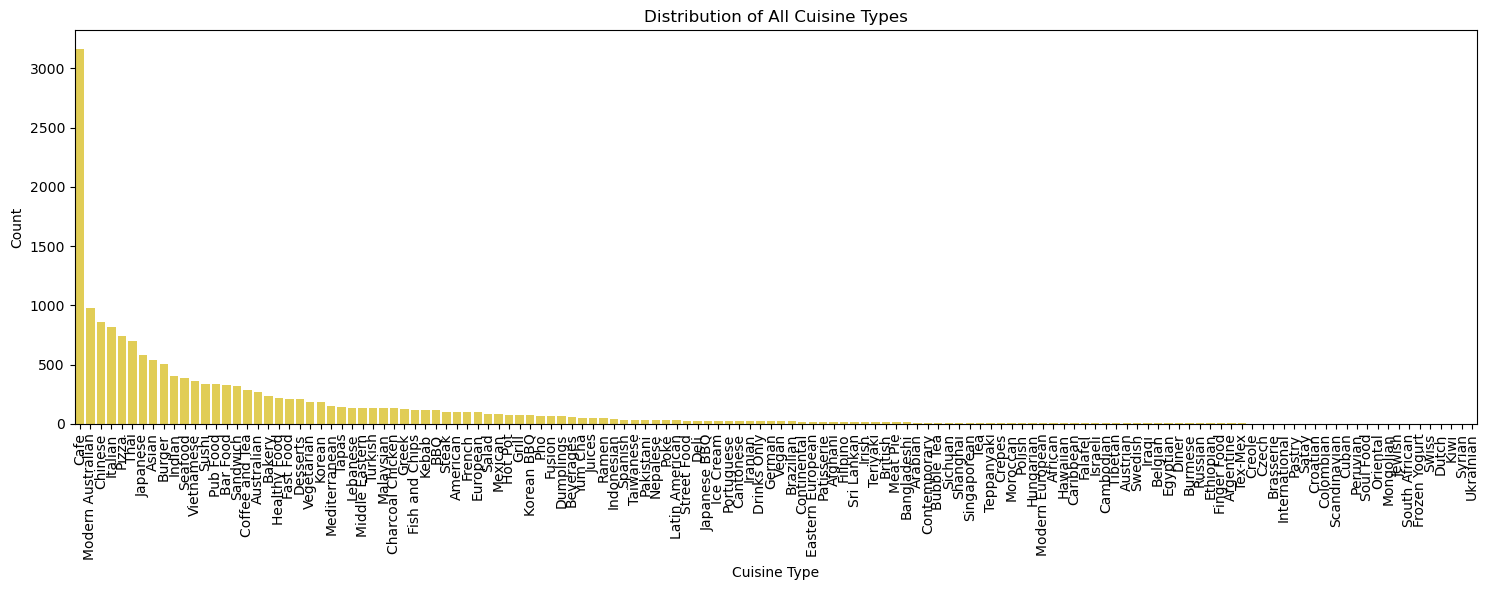


Top 10 Cuisines:
Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
Thai                  703
Japanese              578
Asian                 536
Burger                506
Indian                402
dtype: int64


In [6]:
# Answer 2
# convert 'cuisine' from string to a list of cuisines
df['cuisine'] = df['cuisine'].apply(eval)
all_cuisines = []

# iterate over each row and add cuisines to the list
for cuisine_list in df['cuisine']:
    all_cuisines.extend(cuisine_list)

# create a Pandas Series
cuisine_lists = pd.Series(all_cuisines)

# count each unique cuisine
cuisine_counts = cuisine_lists.value_counts()

# display
print(cuisine_counts)

# create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, color='#F8DE3F')
plt.title('Distribution of All Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=90) 

# display the plot
plt.tight_layout()
plt.show()

print("\nTop 10 Cuisines:")
print(cuisine_counts.head(10))

In [7]:
# calculate the number of unique cuisines
num_unique_cuisine = len(cuisine_counts)

# print the result
print("Result:")
print("Number of unique cuisines served by Sydney restaurants is:", num_unique_cuisine)

Result:
Number of unique cuisines served by Sydney restaurants is: 134


#### Q1.2 Which suburbs (top-3) have the highest number of restaurants?

                              Suburb  Count
0                                CBD    792
1                        Surry Hills    269
2                         Parramatta    264
3                          Chinatown    228
4                       Darlinghurst    193
..                               ...    ...
334               Coogee Legion Club      1
335           Royal Exhibition Hotel      1
336                          Jenolan      1
337   Sofitel Sydney Darling Harbour      1
338  Glenrose Villge Shopping Centre      1

[339 rows x 2 columns]


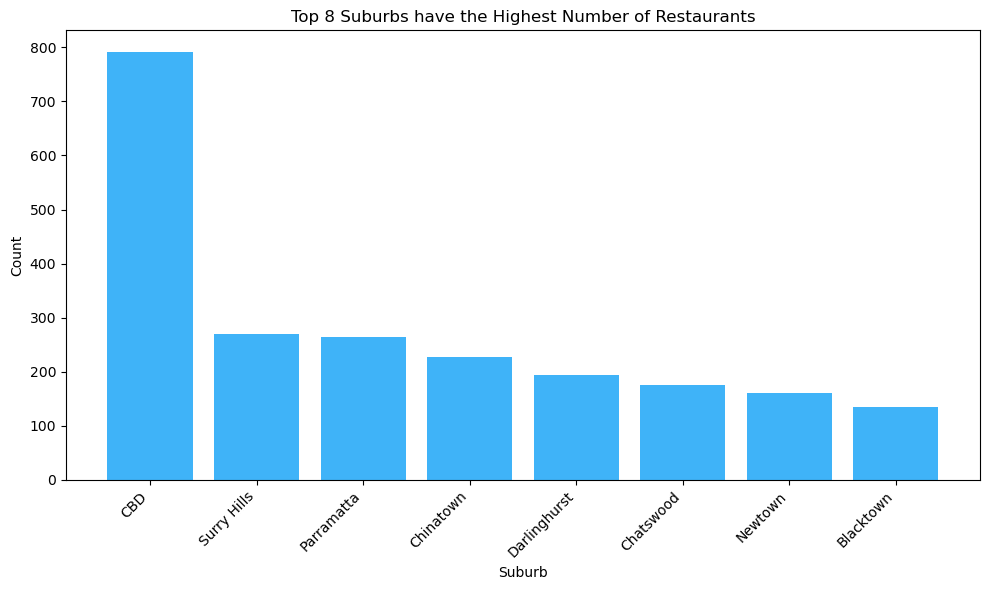

In [8]:
# extract suburbs from the "subzone" column
df['suburb'] = df['subzone'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

# count the occurrences of each suburb
suburb_counts = df['suburb'].value_counts().reset_index()
suburb_counts.columns = ['Suburb', 'Count']

# display the Data
print(suburb_counts)

# create a bar plot for the top 10 suburbs
top_8_suburbs = suburb_counts.head(8)
plt.figure(figsize=(10, 6))
plt.bar(top_8_suburbs['Suburb'], top_8_suburbs['Count'], color='#3FB3F8')
plt.title('Top 8 Suburbs have the Highest Number of Restaurants')
plt.xlabel('Suburb')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# display the plot
plt.tight_layout()
plt.show()


In [9]:
# print the result
top_3_suburbs = suburb_counts['Suburb'].head(3).tolist()
print("\nTop 3 Suburbs with the Highest Number of Restaurants:")
print(top_3_suburbs)


Top 3 Suburbs with the Highest Number of Restaurants:
['CBD', 'Surry Hills', 'Parramatta']


#### Q1.3 “Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive”. Do you agree on this statement or not? Please support your answer by numbers and visuals. 

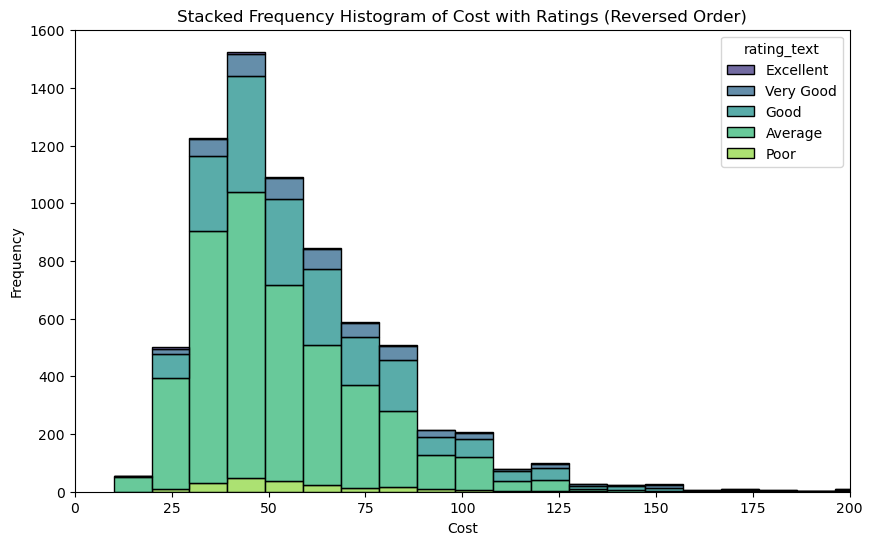

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the order of 'rating_text' categories with 'Excellent' on top
rating_order = ['Excellent', 'Very Good', 'Good', 'Average',  'Poor']
df['rating_text'] = pd.Categorical(df['rating_text'], categories=rating_order, ordered=True)

# Create a stacked histogram with 'rating_text' in reversed order
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cost', hue='rating_text', bins=50, common_norm=False, palette="viridis", multiple="stack")
plt.title("Stacked Frequency Histogram of Cost with Ratings (Reversed Order)")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.xlim(0, 200)  # Set the x-axis range to 0-200

plt.show()

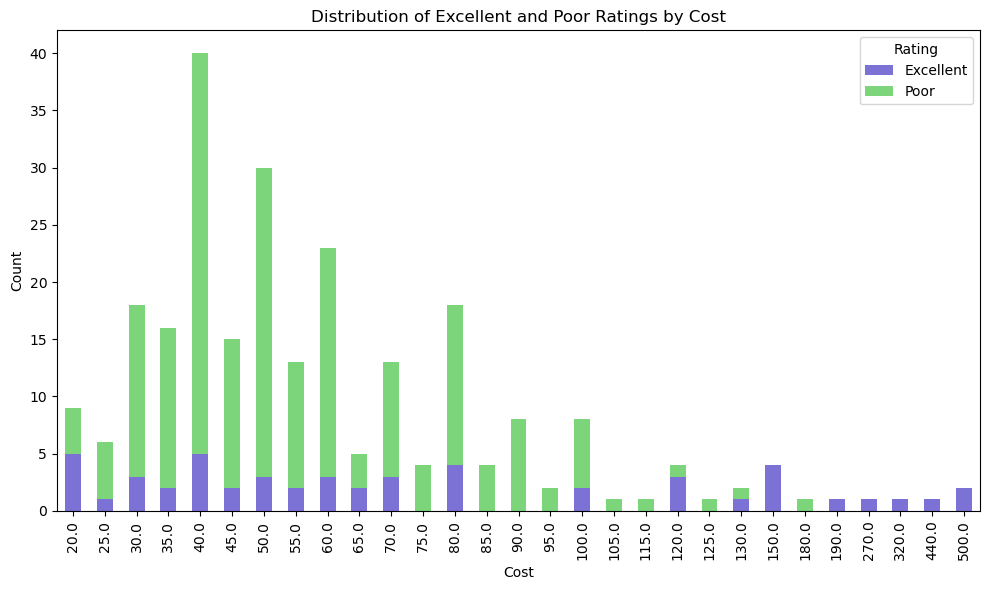

In [11]:
# filter rows for 'Excellent' and 'Poor'
df_filed = df[df['rating_text'].isin(['Excellent', 'Poor'])]

# create a crosstab to count occurrences of 'rating_text' for each 'cost' category
ct = pd.crosstab(df_filed['cost'], df_filed['rating_text'])

# define colors
colors = ['#7C72D5', '#7CD47B']

# Plot a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Distribution of Excellent and Poor Ratings by Cost')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.legend(title='Rating', labels=['Excellent', 'Poor'])

# display the plot
plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import chi2_contingency

# create a contingency table (cross-tabulation) between 'cost' and 'rating_text'
contingency_table = pd.crosstab(df_filed['cost'], df_filed['rating_text'])

# perform the chi-squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)


# check the p-value and print the result
alpha = 0.05
if p < alpha:
    print("There is a significant association between 'cost' and 'rating_text'.")
else:
    print("There is no significant association between 'cost' and 'rating_text'.")

# print the result
print()


Chi-squared statistic: 67.49275107836776
P-value: 4.137578006075132e-05
There is a significant association between 'cost' and 'rating_text'.



Conclusion:

In the stacked bar chart, we can visually assess the distribution of the "cost" category in the "excellent" and "poor" ratings. According to the results, it can be seen that restaurants with "Poor" ratings are rarely expensive.

In addition, the chi-square statistic measures the strength of the association between the two categorical variables, and the p-value indicates that there is a significant association between cost and rating.

However, restaurants with "excellent" ratings are distributed across all price ranges.


### Q2 Perform exploratory analysis for the variables of the data.

#### Q2.1 Cost

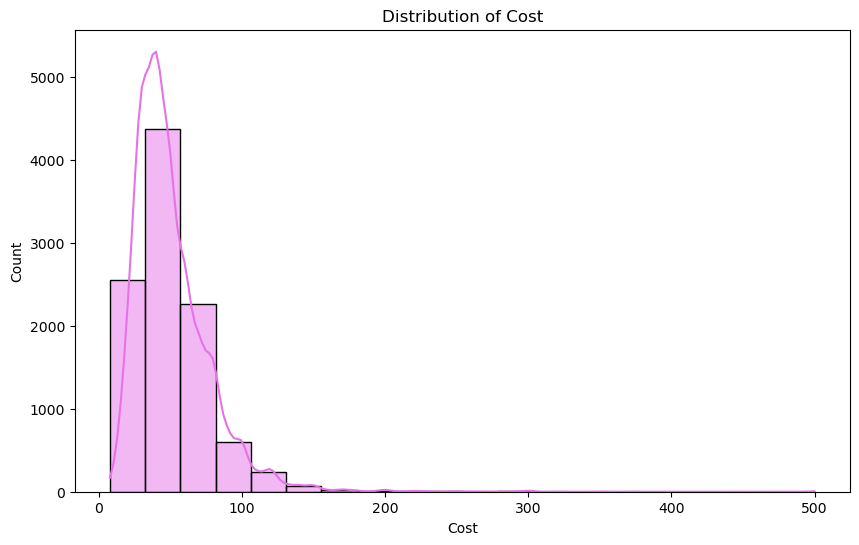

Descriptive Statistics for 'Cost':
 count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


In [13]:
# EDA for 'Cost'
plt.figure(figsize=(10, 6))
sns.histplot(df['cost'], bins=20, kde=True, color='#E672E8')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

# descriptive insights for 'Cost'
cost_sum = df['cost'].describe()
print("Descriptive Statistics for 'Cost':\n", cost_sum)

#### Q2.2 Rating

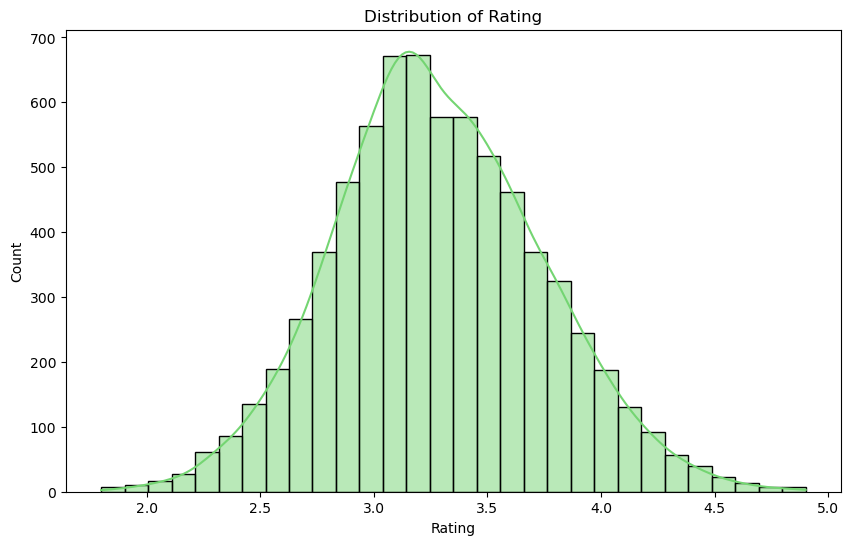

Descriptive Statistics for 'Rating':
 count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


In [14]:
# EDA for 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_number'], bins=30, kde=True, color='#74D572')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# descriptive insights for 'Rating'
rating_sum = df['rating_number'].describe()
print("Descriptive Statistics for 'Rating':\n", rating_sum)

#### Q2.3 Type

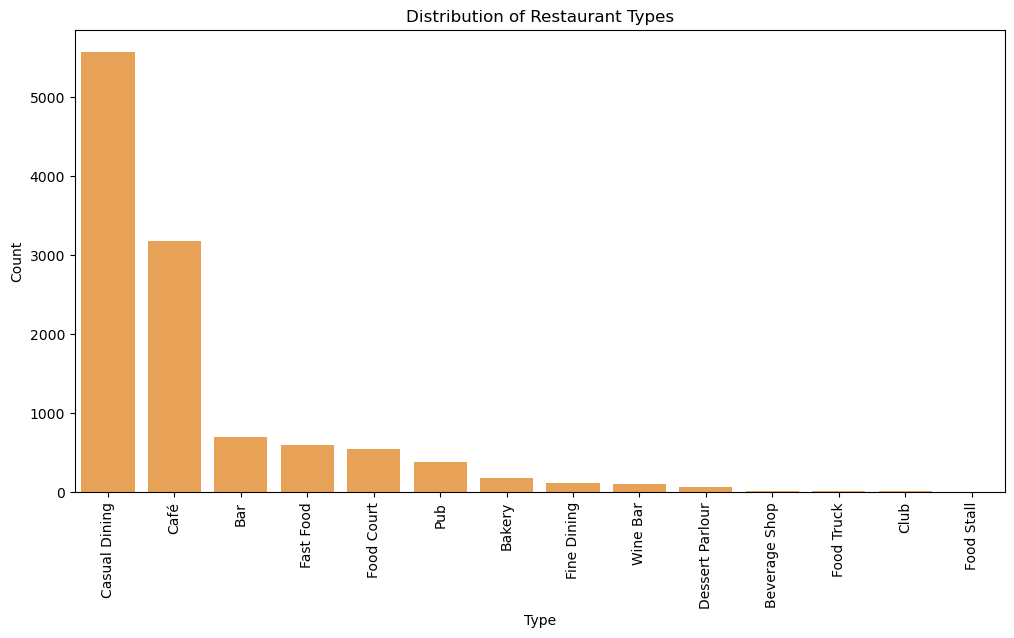

Counts for each Restaurant Type:
 Casual Dining      5566
Café               3169
Bar                 692
Fast Food           588
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
dtype: int64


In [15]:
# Filter out missing values rows
df_filtered = df.dropna(subset=['type'])
all_types = []

# Iterate through each row and append types to the list
for types_list in df_filtered['type']:
    all_types.extend(eval(types_list))

# Create a Pandas Series
type_lists = pd.Series(all_types)

# Create a countplot to visualize the distribution of restaurant types
plt.figure(figsize=(12, 6))
type_numbers = type_lists.value_counts()
sns.barplot(x=type_numbers.index, y=type_numbers.values, color='#FFA340')
plt.title('Distribution of Restaurant Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Descriptive insights for 'Type'
print("Counts for each Restaurant Type:\n", type_numbers)

### Q3 Produce Cuisine Density Map

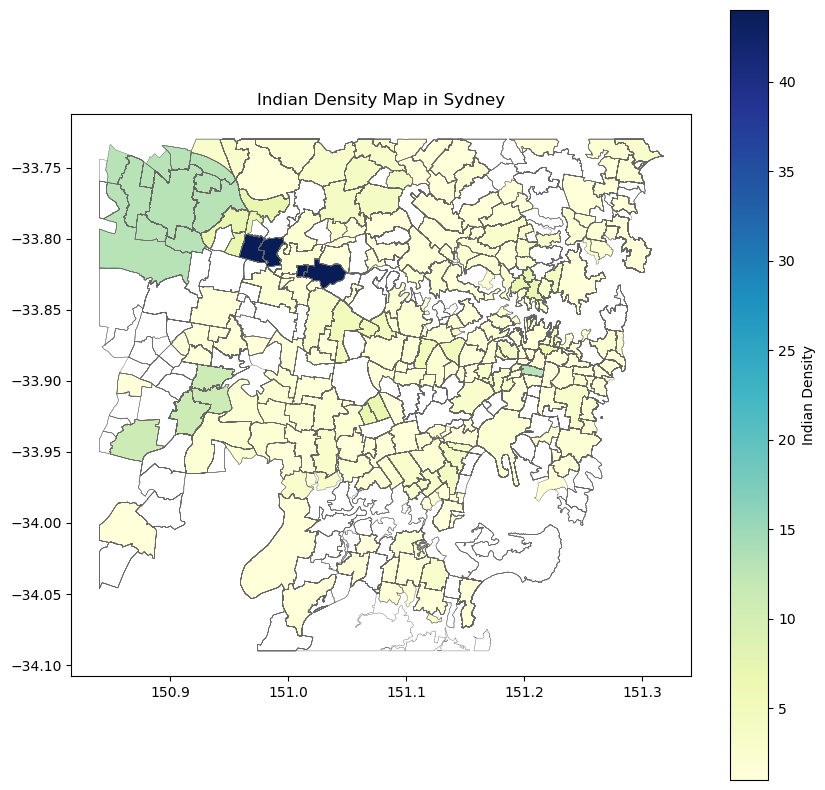

In [16]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# define the function to show cuisine density map
def show_cuisine_densitymap(cuisine='Indian'):
    
    # read the GeoJSON file as a GeoDataFrame
    geojson_path = '/Users/carrie/Desktop/11523/data/sydney.geojson'
    sydney_gdf = gpd.read_file(geojson_path)
    
    # read the restaurant data file
    restaurant_data_path = "/Users/carrie/Desktop/11523/data/zomato_df_final_data.csv"
    restaurant_df = pd.read_csv(restaurant_data_path)
    
    # create a GeoDataFrame for restaurants by converting latitude and longitude into Point geometries
    geometry = [Point(xy) for xy in zip(restaurant_df['lng'], restaurant_df['lat'])]
    gdf_restaurants = gpd.GeoDataFrame(restaurant_df, geometry=geometry)
    
    # Set the CRS for the 'gdf_restaurants' GeoDataFrame to match 'sydney_geo'
    gdf_restaurants.crs = sydney_gdf.crs

    # perform a spatial join between Sydney's GeoDataFrame and the restaurant GeoDataFrame
    sydney_with_restaurants = gpd.sjoin(sydney_gdf, gdf_restaurants, predicate='intersects')
    
    # filter the data to include only the selected cuisine
    filtered_gdf = sydney_with_restaurants[sydney_with_restaurants['cuisine'].apply(lambda x: cuisine in x)]
    
    # group by suburb and count the number of restaurants
    suburb_counts = filtered_gdf.groupby('subzone').size().reset_index(name='Restaurant_Count')
    
    # merge the restaurant count back into the GeoDataFrame
    suburb_gdf = sydney_with_restaurants.merge(suburb_counts, on='subzone', how='left')

    # plot the cuisine density map
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    suburb_gdf.boundary.plot(ax=ax, linewidth=0.3, color='#666666')
    suburb_gdf.plot(column='Restaurant_Count',cmap='YlGnBu', ax=ax, legend=True, legend_kwds={'label': f'{cuisine} Density'})
    plt.title(f'{cuisine} Density Map in Sydney')
    plt.show()

# example: Show Indian cuisine density map
show_cuisine_densitymap('Indian')